In [1]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
%pip install matplotlib

The idea of machine learning and deep learning is to take some data from the past, build and algorithm to discover patterns and then use those patterns to predict the future.

Let's start with `torch` and `torch.nn` , where `nn` stands for neural network, and this contains the building blocks for creating a neural network in PyTorch

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# let's see the pytorch version
torch.__version__

'2.6.0+cu124'

## **Data**

Data in ML can be anything, a table of numbers, imahes, videos, audios , texts, anything.


Whatever it is, we convert the data into numbers (a representation) and then pick or build a model to learn the representation as best as possible.




Let's start with simple **Linear Regression**, we will use it to create data with known **parameters**, and then we will see whether a model built by PyTorch can estimate those parameters using **Gradient Descent**

In [4]:
# the known parameters
weight = 0.7
bias = 0.3

# create some data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# let's see the data

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")

X: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


Now, we want to build a model that can learn the relationship between $X$ (features) and $y$ (labels)

### **Splitting Data**

We need to split our data into a `training_set` and a `test_set` (sometimes even a `validation_set`)

Each split serves a particular purpose:

- Training set is the one from which the model learns(like the course materials you study during the semester). 	It amounts to ~60-80% of the total data.
- Validation set is the one from which the model gets tuned (like the practice exam you take before the final exam). 	It amounts to ~10-20% of the total data, as is not always necessary to make one.
- Testing set is the one on which the model gets evaluated(like the final exam you take at the end of the semester). It amounts to ~10-20% of the total data.

In [5]:
# creating a split
train_split = int(0.75 * len(X)) # we are working with 75% of the original data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# let's see our data

print(f"X_train: {X_train[:10]}")
print(f"y_train: {y_train[:10]}")

X_train: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y_train: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [6]:
# let's see how much we got in each
print(f"X_train: {len(X_train)}")
print(f"y_train: {len(y_train)}")
print("------------------------")
print(f"X_test: {len(X_test)}")
print(f"y_test: {len(y_test)}")


X_train: 37
y_train: 37
------------------------
X_test: 13
y_test: 13


Now, the model we are going to build, is going to create or learn the relationship between `X_train` and `y_train` and then we will evaluate this on the `X_text` and `y_test`

In [7]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None, save_path=None):
    """
    Plots training data, test data, and model predictions.

    Parameters:
    - train_data: array-like, shape (n_train,)
    - train_labels: array-like, shape (n_train,)
    - test_data: array-like, shape (n_test,)
    - test_labels: array-like, shape (n_test,)
    - predictions: array-like, shape (n_test,) (optional)
    - save_path: str (optional), path to save the figure
    """
    plt.figure(figsize=(12, 6))

    # Plot training data
    plt.scatter(train_data, train_labels, color='royalblue', alpha=0.6, s=30, label='Training Data')

    # Plot test data
    plt.scatter(test_data, test_labels, color='seagreen', alpha=0.6, s=30, label='Test Data')

    # Plot predictions if available
    if predictions is not None:
        plt.scatter(test_data, predictions, color='crimson', alpha=0.6, s=30, label='Predictions')
        # Optional: draw error lines
        for x, y_true, y_pred in zip(test_data, test_labels, predictions):
            plt.plot([x, x], [y_true, y_pred], color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

    # Aesthetics
    plt.title("Model Predictions vs True Labels", fontsize=16)
    plt.xlabel("Input Feature", fontsize=14)
    plt.ylabel("Target Value", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(fontsize=12)
    plt.tight_layout()

    # Optional: Save figure
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

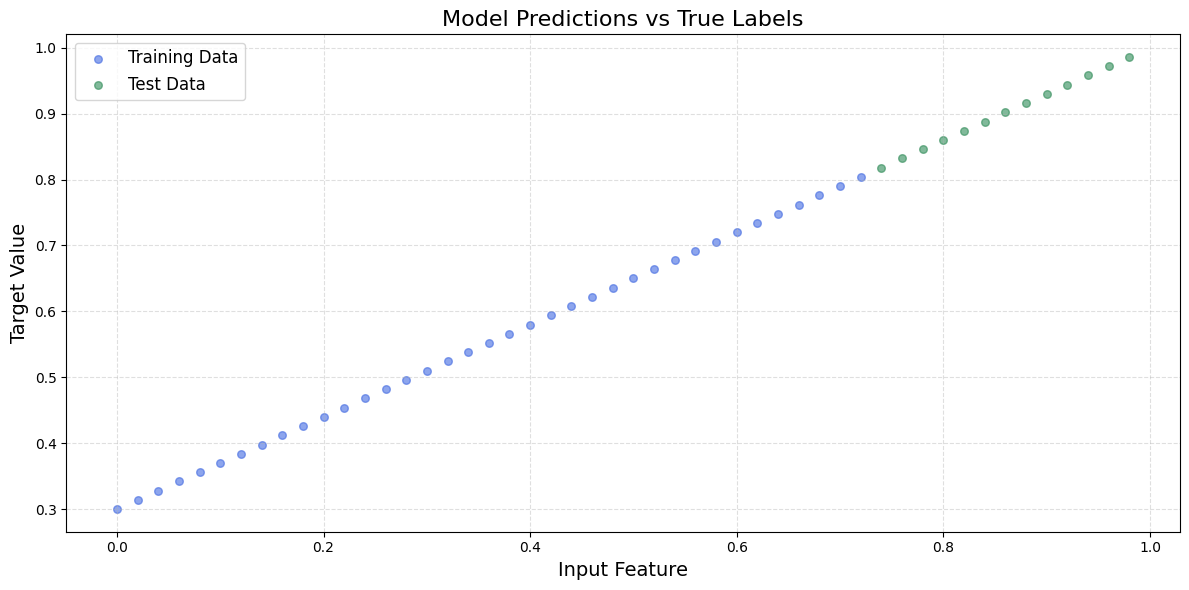

In [8]:
plot_predictions(X_train, y_train, X_test, y_test)

Put a special emphasis on visualizing the data, it makes life easier.

## **Build the Model**

let's build a model to use the blue dots as shown in the above plot to predice the green dots

In [9]:
# make a linear regression model class

class LinearRegressionModel(nn.Module):
  def __init__(self):
    # initialize the parent class (nn.Module) -> essential for all pytorch models
    super().__init__()

    # initialize a learnable weight parameter (slope `m` in y = mx+b)
    self.weights = nn.Parameter(
        torch.randn(1,dtype=torch.float32), # we start with a random float32 value
        requires_grad=True # enable gradient tracking for optimization
    )


    # initialize a learnable bias parameter (intercept `b` in y =mx+b)
    self.bias = nn.Parameter(
        torch.randn(1, dtype=torch.float32), # again start with some random float32 value
        requires_grad=True # enable gradient tracking for optimization
    )


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass defines how the input `x` is transformed into output.

    For linear regression, the transformation is simply:
    y = weights * x + bias
    """
    return self.weights * x + self.bias

### **PyTorch building essentials**

Pytorch has more or less, around four essential modules we can make use of to create almost any kind of neural network.


They are:

- `torch.nn` - Contains all of the building blocks for computational graphs.
  - `torch.nn.Parameter` - Stores tensors that can be used with `nn.Module`, if `requires_grad=True` gradients are calculated automatically, this is often referred to as **autograd**
  - `torch.nn.Module` - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you are building a neural network in PyTorch, your models should subclass `nn.Module`. Requires a `forward()` method to be implemented.

- `torch.optim` - Contains various optimization algorithms, which tell the model parameters stored in `nn.parameter` how to best change to improve gradient descent and in turn reduce the loss.


- `torch.utils.data.Dataset`

- `torch.utils.data.DataLoader`




In simpler terms:

- `nn.Module` contains the larger building blocks (layers)
- `nn.Parameter` contains the smaller parameters like weights and biases, and put these together to make the `nn.Module`
- `forward()` tells the larger blocks how to make calculations on inputs (which are tensors full of data) within `nn.Module`
- `torch.optim` contains optimization methods on how to improve the parameters within `nn.Parameter` to better represent input data

### **Checking contents of PyTorch Model**



In [10]:
# set random seed
torch.manual_seed(135)

# make an instance of the model
model_0 = LinearRegressionModel()

# check the model parameters
print(model_0.state_dict())

# chekc the nn.parameters()
list(model_0.parameters())

OrderedDict([('weights', tensor([-0.4099])), ('bias', tensor([0.2912]))])


[Parameter containing:
 tensor([-0.4099], requires_grad=True),
 Parameter containing:
 tensor([0.2912], requires_grad=True)]

These are just random values,  we start with them and then gradually learn them

### **Making Predictions**



Here we make use of `torch.inference_mode()`, we pass it the test data `X_test` to see how closely it predicts `y_test`

When we pass the data to our model it will go throgh the `forward()` method and produce a result

In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)

print(f"y_preds: {y_preds[:10]}")
print(f"y_test: {y_test[:10]}")

y_preds: tensor([[-0.0121],
        [-0.0203],
        [-0.0285],
        [-0.0367],
        [-0.0449],
        [-0.0531],
        [-0.0613],
        [-0.0695],
        [-0.0777],
        [-0.0859]])
y_test: tensor([[0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440]])


In [12]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions: {len(y_preds)}")
print(f"Predictions shape: {y_preds.shape}")
print(f"Predictions Made: \n{y_preds}")

Number of testing samples: 13
Number of predictions: 13
Predictions shape: torch.Size([13, 1])
Predictions Made: 
tensor([[-0.0121],
        [-0.0203],
        [-0.0285],
        [-0.0367],
        [-0.0449],
        [-0.0531],
        [-0.0613],
        [-0.0695],
        [-0.0777],
        [-0.0859],
        [-0.0941],
        [-0.1023],
        [-0.1105]])


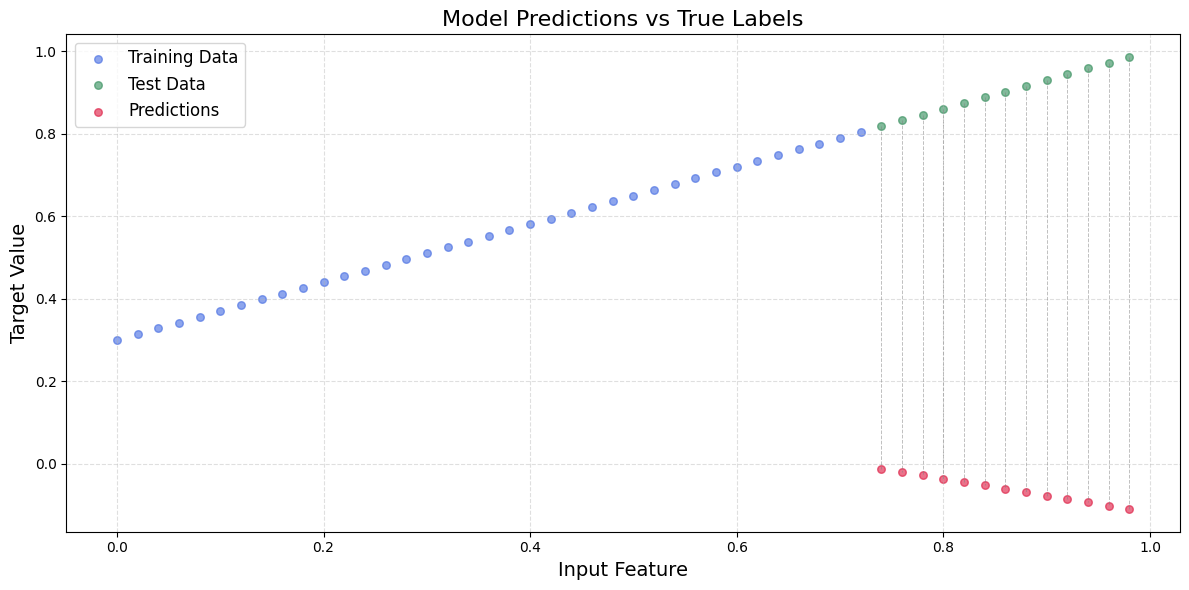

In [13]:
# and if we plot it
plot_predictions(X_train, y_train, X_test, y_test, y_preds)
#

## **Train Model**

Now, let's actually train the model.  We update the `weights` and `bias` values we set randomly. For that we would need a **Loss Function**

### **Loss Function**

**Loss function** measures how wrong our model's predicitoon are compared to the truth labels. Lower the better. Pytorch has plenty of build in loss function, like the Mean Absolute Error for regression problems in `torch.nn.L1Loss()` or the binary cross entropy loss for binary classification in `torch.nn.BCELoss()`


**Optimizer** tells our model how to update its internal parameters to best lower the loss, there are mnay optimizer implemented in `torch.optim`, like the stochastic gradient descent `torch.optim.SGD()` or the Adam Optimizer `torch.optim.Adam()`

We will make use fo `torch.nn.L1Loss` and SGD optimizer using `torch.optim.SGD(params,lr)` where
- `params` is the target model parameters we would like to optimize
- `lr` is the learning rate, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter. Common starting values for the learning rate are $0.01, 0.001, 0.0001$, however, these can also be adjusted over time (this is called *learning rate scheduling*).

In [14]:
# let's write in code
# loss function
loss_func = nn.L1Loss()

# the optimizer
optim = torch.optim.SGD(params=model_0.parameters(), lr= 0.01)

### **Optimization Loop**

Training Loop involves the model going through the training data and learning the relationship between the `features` and `labels`.

Testing loop involves going through the testing data and evaluating how good the patterns are that the model learned on the training data

### **PyTorch Training Loop**

1. Forward Pass : The model goes through all of the training data once, performing its `forward()` function calculations. : `model(x_train)`
2. Calculate the Loss : The model's output are compared to the ground truth and evaluated to see how wrong they are.:  `loss = loss_fn(y_pred, y_train)`
3. Zero Gradients : The optimizers gradients are set to zero, so they can be recalculated for the specific training step. : `optimizer.zero_grad()`
4. Perform backpropagation on the loss : Computes the gradient of the loss with respect for every model parameter to be updated. This is known as **backpropagation**. : `loss.backward()`
5. Update the optimizer : Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them. : `optimizer.step()`

### **PyTorch Testing Loop**


1. Forward pass : The model goes through all of the testing data once, performing its `forward()` function calculations.
2. Calculate the loss : The model's outputs are compared to the ground truth and evaluated how wrong they are
3. Calculate evaluation metric : Alongside the loss value we also want to see other evaluaion metric

In [15]:
# number of trainig iterations (epochs)
epochs = 1000

# list to stor loss values for plotting or tracking
train_loss_values = []
test_loss_values = []
epoch_count = []


# training loop
for epoch in range(epochs):

  # set model to training mode
  model_0.train()
  # 1. Perform a forward pass on the training data to compute predictions
  y_train_pred = model_0(X_train)

  # 2. Compute the training loss between predictions and true labels
  train_loss = loss_func(y_train_pred, y_train)

  # 3. Clear any previously accumulated gradients
  optim.zero_grad()

  # 4. Perform backpropagation: compute gradients of loss w.r.t. parameters
  train_loss.backward()

  # 5. Update model parameters using the gradients
  optim.step()

  # === EVALUATION ===

  # Set model to evaluation mode (disables features like dropout, batch norm)
  model_0.eval()

  # Disable gradient tracking to speed up inference and reduce memory usage
  with torch.inference_mode():
      # 1. Forward pass on the test data
      y_test_pred = model_0(X_test)

      # 2. Compute test loss (ensure label type matches prediction type)
      test_loss = loss_func(y_test_pred, y_test.type(torch.float32))

  # Every 10 epochs, log the loss values
  if epoch % 10 == 0:
      print(f"Epoch {epoch:03} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

      # Save values for later visualization
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.detach().cpu().numpy())
      test_loss_values.append(test_loss.detach().cpu().numpy())



Epoch 000 | Train Loss: 0.40834 | Test Loss: 0.95020
Epoch 010 | Train Loss: 0.31668 | Test Loss: 0.83243
Epoch 020 | Train Loss: 0.25820 | Test Loss: 0.73652
Epoch 030 | Train Loss: 0.22163 | Test Loss: 0.65882
Epoch 040 | Train Loss: 0.19862 | Test Loss: 0.59695
Epoch 050 | Train Loss: 0.18418 | Test Loss: 0.54748
Epoch 060 | Train Loss: 0.17498 | Test Loss: 0.50940
Epoch 070 | Train Loss: 0.16863 | Test Loss: 0.47953
Epoch 080 | Train Loss: 0.16373 | Test Loss: 0.45520
Epoch 090 | Train Loss: 0.15987 | Test Loss: 0.43577
Epoch 100 | Train Loss: 0.15630 | Test Loss: 0.41987
Epoch 110 | Train Loss: 0.15316 | Test Loss: 0.40751
Epoch 120 | Train Loss: 0.15002 | Test Loss: 0.39515
Epoch 130 | Train Loss: 0.14688 | Test Loss: 0.38279
Epoch 140 | Train Loss: 0.14376 | Test Loss: 0.37115
Epoch 150 | Train Loss: 0.14075 | Test Loss: 0.36381
Epoch 160 | Train Loss: 0.13775 | Test Loss: 0.35575
Epoch 170 | Train Loss: 0.13475 | Test Loss: 0.34770
Epoch 180 | Train Loss: 0.13174 | Test Loss: 0

Now, let's plot

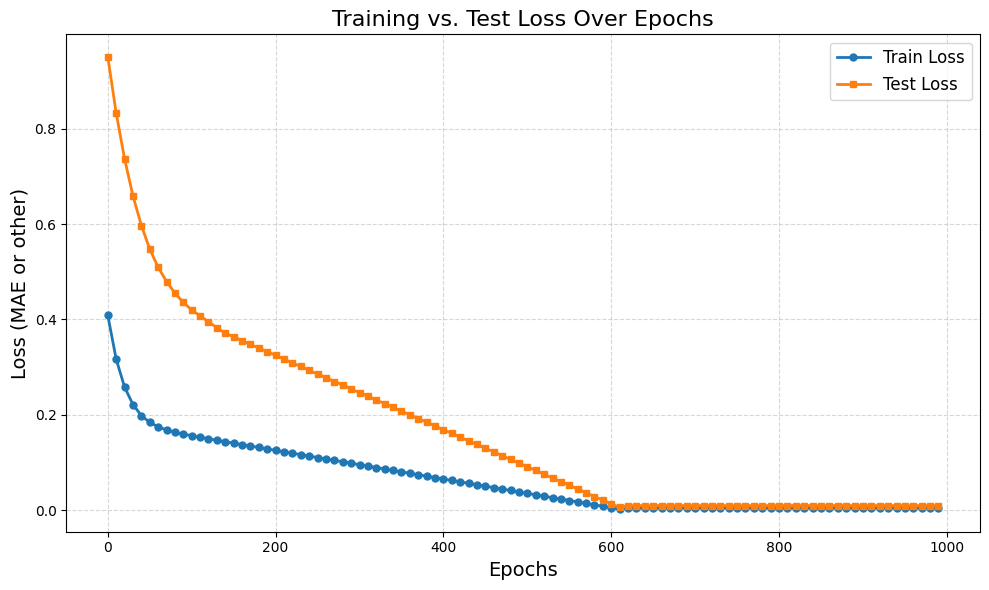

In [16]:
# Set figure size and style
plt.figure(figsize=(10, 6))

# Plot training and test loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss", linewidth=2, marker='o', markersize=5)
plt.plot(epoch_count, test_loss_values, label="Test Loss", linewidth=2, marker='s', markersize=5)

# Add titles and axis labels
plt.title("Training vs. Test Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MAE or other)", fontsize=14)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show legend
plt.legend(fontsize=12)

# Tight layout ensures nothing gets cut off
plt.tight_layout()

# Show the plot
plt.show()

As we can see in the plot, the loss is going down. let's now inspect our model's `state_dict()` to see how close our model gets to the original value

In [17]:
# Display the learned parameters (weights and bias) of the model
print("🔍 The model learned the following parameters:")
for name, param in model_0.state_dict().items():
    print(f"{name:>10}: {param.item():.4f}")

# Compare with the true/original values (if known)
print("\n📌 Original/true values used to generate data:")
print(f"{'weights':>10}: {weight:.4f}")
print(f"{'bias':>10}: {bias:.4f}")


🔍 The model learned the following parameters:
   weights: 0.6969
      bias: 0.3058

📌 Original/true values used to generate data:
   weights: 0.7000
      bias: 0.3000


## **Making Predicitons**

Once, we have trained the model, we would like to see the predicitons

Remember to:

1. Set the model in evaluation mode `model.eval()`
2. Make the predictions using the inference mode context manager `with torch.inference_mode():`
3. All predictions should be made with objects on the same device

In [18]:
# 1. Set the model to evaluation mode
# This disables behaviors like dropout (if any) and ensures consistent output
model_0.eval()

# 2. Perform inference using torch.inference_mode() (more efficient than no_grad)
with torch.inference_mode():
    # 3. Perform a forward pass to get predictions
    # Since we're not using GPU here, no need to move data or model to `.to(device)`
    y_preds = model_0(X_test)

# 4. Display the predictions (they'll be a torch tensor)
y_preds


tensor([[0.8215],
        [0.8355],
        [0.8494],
        [0.8634],
        [0.8773],
        [0.8912],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9470],
        [0.9609],
        [0.9749],
        [0.9888]])

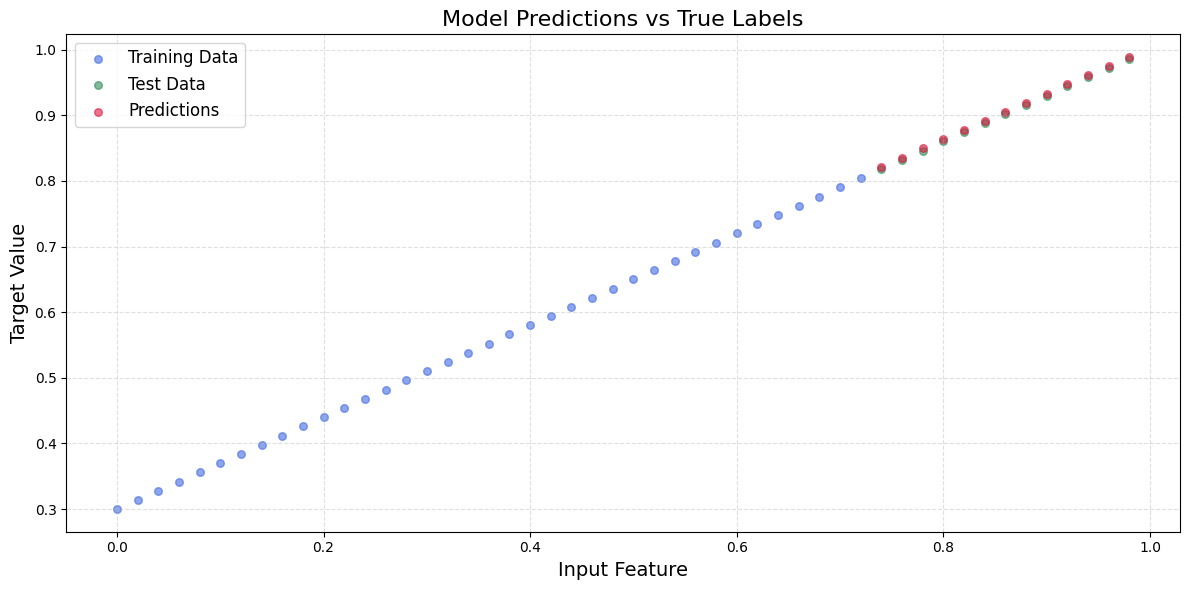

In [19]:
# plot it
plot_predictions(predictions=y_preds, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

### **Saving and loading a PyTorch Model**

Now, since your model is trained, you might want to save it and export it somewhere.

- `torch.save` - Saves a serialized object to disk using Python's `pickle` utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`

- `torch.load` - Uses `pickle's` unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to.

- `torch.nn.Module.load_state_dict` - Loads a model's parameter dictionary using a saved `state_dict()` object.

#### **Saving a Pytorch model**




In [20]:
from pathlib import Path

# make a directoru to save the modesl
model_path = Path("pytorch_models")
model_path.mkdir(parents=True, exist_ok=True)


# now make the model save path

model_name = "01_pytorch_workflow_model_0.pth"
model_save_path = model_path / model_name

# save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_0.state_dict(), f=model_save_path)

Saving model to: pytorch_models/01_pytorch_workflow_model_0.pth


In [21]:
# we can also check if the model is there
!ls -l pytorch_models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Jun 19 04:25 pytorch_models/01_pytorch_workflow_model_0.pth


#### **Loading a saved Pytorch model**

Since we saved the model's parameters, which is just the dictionary of learned parameters and not the full model, we first have to load the `state_dict()` with `torch.load()` and then pass the `state_dict()` to new instance of our model.


The disadvantages of saving the entire model is that the serialized data is bound to specific classes and the exact directory structure used when the model is saved. And by this the code can break in various ways while using in refactors and other projects


So instead it's more flexible to save and laod just the `state_dict()`.

In [22]:
# create a new instance of the model
loaded_model_0 = LinearRegressionModel()

# now load the parameters to it

loaded_model_0.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

Now, let's test our loaded model.

In [23]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [24]:
print(f"Loaded Model Predictions: {loaded_model_preds[:10]}")
print(f"Original Model Predictions: {y_preds[:10]}")

# are they the same??
print(f"Are the models the same: {y_preds == loaded_model_preds}")

Loaded Model Predictions: tensor([[0.8215],
        [0.8355],
        [0.8494],
        [0.8634],
        [0.8773],
        [0.8912],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9470]])
Original Model Predictions: tensor([[0.8215],
        [0.8355],
        [0.8494],
        [0.8634],
        [0.8773],
        [0.8912],
        [0.9052],
        [0.9191],
        [0.9330],
        [0.9470]])
Are the models the same: tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


## **Putting it all together**

Let's do with GPU this time

In [25]:
torch.__version__

'2.6.0+cu124'

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### **DATA**

Let's create a fake data, hardcode some weight and bias and linear regression

In [27]:
weight = 0.9
bias = 0.1

# range

start = 0
end = 10
step = 0.05


# make x and y

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")

# how long?
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X: tensor([[0.0000],
        [0.0500],
        [0.1000],
        [0.1500],
        [0.2000],
        [0.2500],
        [0.3000],
        [0.3500],
        [0.4000],
        [0.4500]])
y: tensor([[0.1000],
        [0.1450],
        [0.1900],
        [0.2350],
        [0.2800],
        [0.3250],
        [0.3700],
        [0.4150],
        [0.4600],
        [0.5050]])
X shape: torch.Size([200, 1])
y shape: torch.Size([200, 1])


Now there are 2000 data points, we will do a 80/20 split this time

In [28]:
# split the data
train_split = int(0.8 * len(X))

X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

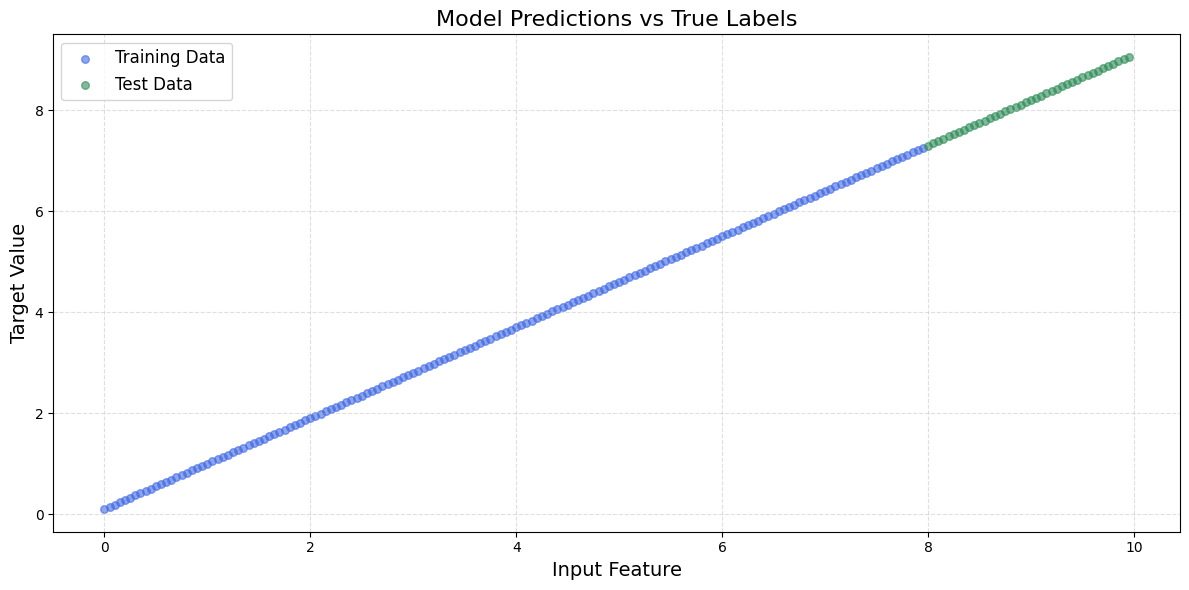

In [29]:
# visualization
plot_predictions(X_train, y_train, X_test, y_test)
#

### **PyTorch Linear Model**

In [30]:
# make a linear regression model class

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    # initialize the parent class (nn.Module) -> essential for all pytorch models
    super().__init__()

    # initialize a learnable weight parameter (slope `m` in y = mx+b)
    self.linear_layer = nn.Linear(in_features=1, out_features=1)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    """
    Forward pass defines how the input `x` is transformed into output.

    For linear regression, the transformation is simply:
    y = weights * x + bias
    """
    return self.linear_layer(x)

In [31]:
torch.manual_seed(135)
model_1 = LinearRegressionModelV2()
print(f"Model parameters: {model_1.state_dict()}")

# what type of model
print(f"Model type: {model_1}")

Model parameters: OrderedDict([('linear_layer.weight', tensor([[-0.3996]])), ('linear_layer.bias', tensor([0.5338]))])
Model type: LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [32]:
# check the device
next(model_1.parameters()).device

device(type='cpu')

In [33]:
# shift the model tp GPU
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### **Training**

In [34]:
loss_func = nn.L1Loss()


# optimizer
optimz = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [35]:
# number of trainig iterations (epochs)
epochs = 1000


# we have to put all the data to the device as well
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# list to stor loss values for plotting or tracking
train_loss_values = []
test_loss_values = []
epoch_count = []


# training loop
for epoch in range(epochs):

  # set model to training mode
  model_1.train()
  # 1. Perform a forward pass on the training data to compute predictions
  y_train_pred = model_1(X_train)

  # 2. Compute the training loss between predictions and true labels
  train_loss = loss_func(y_train_pred, y_train)

  # 3. Clear any previously accumulated gradients
  optimz.zero_grad()

  # 4. Perform backpropagation: compute gradients of loss w.r.t. parameters
  train_loss.backward()

  # 5. Update model parameters using the gradients
  optimz.step()

  # === EVALUATION ===

  # Set model to evaluation mode (disables features like dropout, batch norm)
  model_1.eval()

  # Disable gradient tracking to speed up inference and reduce memory usage
  with torch.inference_mode():
      # 1. Forward pass on the test data
      y_test_pred = model_1(X_test)

      # 2. Compute test loss (ensure label type matches prediction type)
      test_loss = loss_func(y_test_pred, y_test.type(torch.float32))

  # Every 10 epochs, log the loss values
  if epoch % 10 == 0:
      print(f"Epoch {epoch:03} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

      # Save values for later visualization
      epoch_count.append(epoch)
      train_loss_values.append(train_loss.detach().cpu().numpy())
      test_loss_values.append(test_loss.detach().cpu().numpy())



Epoch 000 | Train Loss: 4.75289 | Test Loss: 10.86518
Epoch 010 | Train Loss: 3.11373 | Test Loss: 7.23328
Epoch 020 | Train Loss: 1.53696 | Test Loss: 3.67207
Epoch 030 | Train Loss: 0.34480 | Test Loss: 0.69466
Epoch 040 | Train Loss: 0.25900 | Test Loss: 0.37224
Epoch 050 | Train Loss: 0.24223 | Test Loss: 0.35069
Epoch 060 | Train Loss: 0.22544 | Test Loss: 0.32273
Epoch 070 | Train Loss: 0.20867 | Test Loss: 0.30118
Epoch 080 | Train Loss: 0.19190 | Test Loss: 0.27963
Epoch 090 | Train Loss: 0.17512 | Test Loss: 0.25168
Epoch 100 | Train Loss: 0.15835 | Test Loss: 0.23013
Epoch 110 | Train Loss: 0.14156 | Test Loss: 0.20217
Epoch 120 | Train Loss: 0.12479 | Test Loss: 0.18062
Epoch 130 | Train Loss: 0.10801 | Test Loss: 0.15266
Epoch 140 | Train Loss: 0.09125 | Test Loss: 0.13763
Epoch 150 | Train Loss: 0.07976 | Test Loss: 0.22932
Epoch 160 | Train Loss: 0.07096 | Test Loss: 0.33034
Epoch 170 | Train Loss: 0.05105 | Test Loss: 0.17814
Epoch 180 | Train Loss: 0.05239 | Test Loss: 

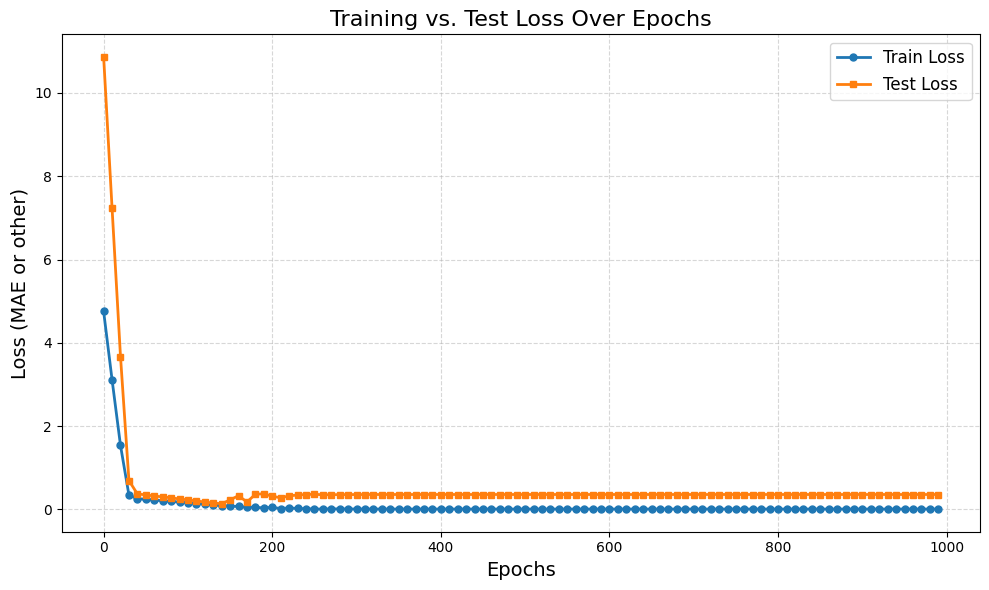

In [36]:
# Set figure size and style
plt.figure(figsize=(10, 6))

# Plot training and test loss curves
plt.plot(epoch_count, train_loss_values, label="Train Loss", linewidth=2, marker='o', markersize=5)
plt.plot(epoch_count, test_loss_values, label="Test Loss", linewidth=2, marker='s', markersize=5)

# Add titles and axis labels
plt.title("Training vs. Test Loss Over Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss (MAE or other)", fontsize=14)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show legend
plt.legend(fontsize=12)

# Tight layout ensures nothing gets cut off
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
# let's see the parameter it has learner as compared to the original ones

# Display the learned parameters (weights and bias) of the model
print("🔍 The model learned the following parameters:")
for name, param in model_1.state_dict().items():
    print(f"{name:>10}: {param.item():.4f}")

# Compare with the true/original values (if known)
print("\n📌 Original/true values used to generate data:")
print(f"{'weights':>10}: {weight:.4f}")
print(f"{'bias':>10}: {bias:.4f}")


🔍 The model learned the following parameters:
linear_layer.weight: 0.8998
linear_layer.bias: 0.1100

📌 Original/true values used to generate data:
   weights: 0.9000
      bias: 0.1000


### **Making Predictions**

In [38]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

print(f"Predictions: {y_preds[:10]}")
print(f"Labels: {y_test[:10]}")

Predictions: tensor([[7.3083],
        [7.3533],
        [7.3983],
        [7.4433],
        [7.4883],
        [7.5333],
        [7.5783],
        [7.6233],
        [7.6682],
        [7.7132]], device='cuda:0')
Labels: tensor([[7.3000],
        [7.3450],
        [7.3900],
        [7.4350],
        [7.4800],
        [7.5250],
        [7.5700],
        [7.6150],
        [7.6600],
        [7.7050]], device='cuda:0')


Now, many libraries like pandas, matplotlib etc aren't capable of using data that is stored in GPU, so shift to CPU

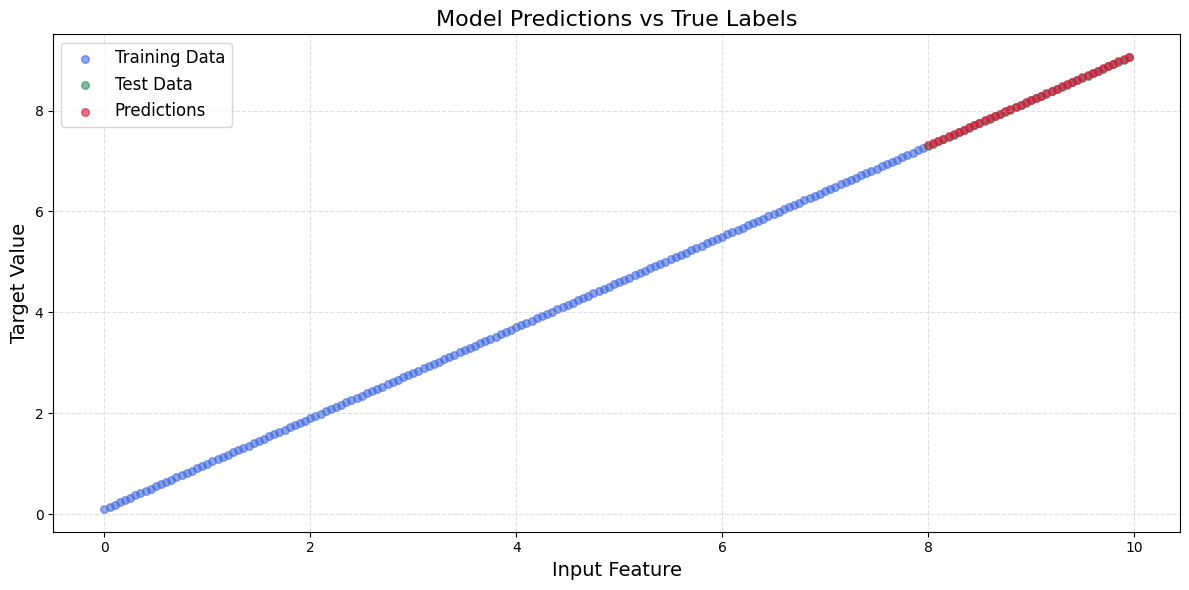

In [39]:
plot_predictions(predictions=y_preds.cpu(), train_data=X_train.cpu(), train_labels=y_train.cpu(), test_data=X_test.cpu(), test_labels=y_test.cpu())

### **Saving and Loading**

In [40]:
print(model_path)

pytorch_models


In [41]:
model_name = "01_pytorch_workflow_model_1.pth"
model_save_path = model_path / model_name

# save the model state dict
print(f"Saving model to: {model_save_path}")
torch.save(obj=model_1.state_dict(), f=model_save_path)

Saving model to: pytorch_models/01_pytorch_workflow_model_1.pth


and now load it back

In [42]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=model_save_path))

loaded_model_1.to(device)

print(f"Model type: \n{loaded_model_1}")
print(f"Model on device \n {next(loaded_model_1.parameters()).device}")

Model type: 
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device 
 cuda:0


Evaluate the loaded model

In [43]:
loaded_model_1.eval()

with torch.inference_mode():
  y_preds = loaded_model_1(X_test)

print(f"Predictions: {y_preds[:10]}")
print(f"Labels: {y_test[:10]}")

Predictions: tensor([[7.3083],
        [7.3533],
        [7.3983],
        [7.4433],
        [7.4883],
        [7.5333],
        [7.5783],
        [7.6233],
        [7.6682],
        [7.7132]], device='cuda:0')
Labels: tensor([[7.3000],
        [7.3450],
        [7.3900],
        [7.4350],
        [7.4800],
        [7.5250],
        [7.5700],
        [7.6150],
        [7.6600],
        [7.7050]], device='cuda:0')
